# Home task 14

## Importing liberaries

In [2]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

##  Load the LFW dataset with at least 70 images per individual

In [4]:
print("\033[94m\n📥 Loading LFW dataset...\033[0m")
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1.0)


📥 Loading LFW dataset...


##  Extract data

In [5]:

X, y = lfw_people.images, lfw_people.target
names = lfw_people.target_names

In [6]:
print(f"\033[92m✅ Loaded {X.shape[0]} images, each {X.shape[1:]} pixels. {len(names)} individuals detected.\033[0m")

✅ Loaded 1288 images, each (125, 94) pixels. 7 individuals detected.


##  Flatten and normalize

In [7]:

X_flat = X.reshape(X.shape[0], -1) / 255.0
print("\033[93m📌 Images flattened and normalized.\033[0m")

📌 Images flattened and normalized.


## Display sample images

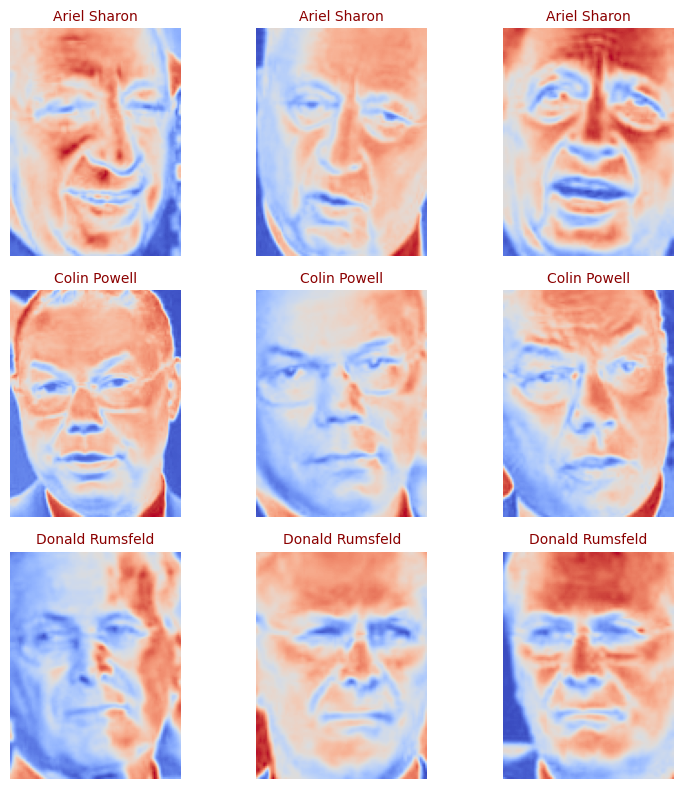

In [8]:

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, person in enumerate(np.unique(y)[:3]):
    for j, img in enumerate(X[y == person][:3]):
        axes[i, j].imshow(img, cmap='coolwarm')
        axes[i, j].axis('off')
        axes[i, j].set_title(names[person], fontsize=10, color='darkred')
plt.tight_layout()

## Apply PCA

In [9]:

print("\033[96m🔍 Applying PCA (50 components)...\033[0m")
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_flat)
print(f"\033[92m✅ PCA complete. Transformed shape: {X_pca.shape}\033[0m")

🔍 Applying PCA (50 components)...
✅ PCA complete. Transformed shape: (1288, 50)


## Reconstruct images

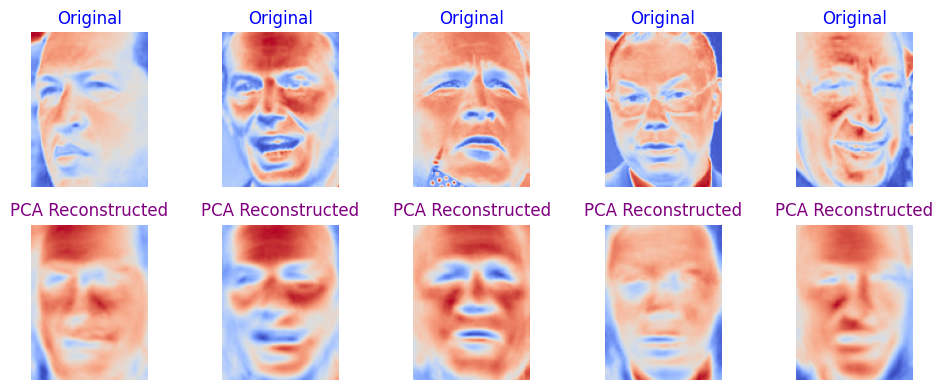

In [10]:

X_recon = pca.inverse_transform(X_pca).reshape(X.shape)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(5):
    axes[0, i].imshow(X[i], cmap='coolwarm')
    axes[0, i].axis('off')
    axes[0, i].set_title("Original", color='blue')
    axes[1, i].imshow(X_recon[i], cmap='coolwarm')
    axes[1, i].axis('off')
    axes[1, i].set_title("PCA Reconstructed", color='purple')
plt.tight_layout()

## Apply LDA

In [11]:

print("\033[95m🔍 Applying LDA...\033[0m")
lda = LinearDiscriminantAnalysis(n_components=min(len(names) - 1, 50))
X_lda = lda.fit_transform(X_flat, y)
print(f"\033[92m✅ LDA complete. Transformed shape: {X_lda.shape}\033[0m")

🔍 Applying LDA...
✅ LDA complete. Transformed shape: (1288, 6)



## Visualize LDA feature space

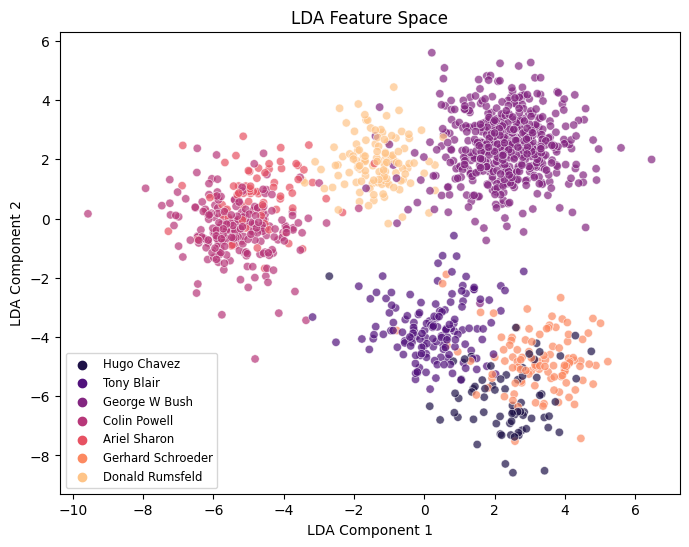

In [12]:

if X_lda.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=[names[i] for i in y], palette='magma', alpha=0.7)
    plt.xlabel("LDA Component 1")
    plt.ylabel("LDA Component 2")
    plt.title("LDA Feature Space")
    plt.legend(loc="best", fontsize="small")
    plt.show()
else:
    print("\033[91m⚠ LDA returned fewer than 2 components. Skipping visualization.\033[0m")


## Feature comparison

📊 Comparing PCA vs. LDA features...
✅ Feature comparison complete!


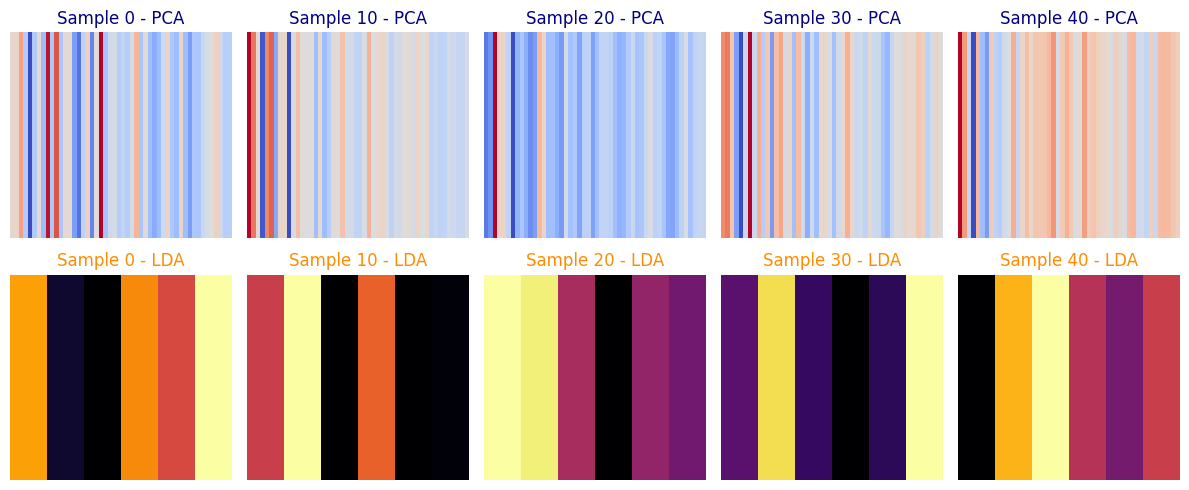

In [13]:

print("\033[94m📊 Comparing PCA vs. LDA features...\033[0m")
samples = [0, 10, 20, 30, 40]
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for idx, i in enumerate(samples):
    axes[0, idx].imshow(X_pca[i].reshape(1, -1), cmap='coolwarm', aspect="auto")
    axes[0, idx].axis('off')
    axes[0, idx].set_title(f"Sample {i} - PCA", color='navy')
    axes[1, idx].imshow(X_lda[i].reshape(1, -1), cmap='inferno', aspect="auto")
    axes[1, idx].axis('off')
    axes[1, idx].set_title(f"Sample {i} - LDA", color='darkorange')
plt.tight_layout()
print("\033[92m✅ Feature comparison complete!\033[0m")
plt.show()